## Carga de librerías

In [154]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import pandas as pd
import tensorflow as tf
from PIL import Image



from skimage.io import imread
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## Carga datos

In [155]:
df = pd.read_csv('./train_set.csv', index_col=0)
df

,path,label
id_img,,
0,../data/images/train/angry\0.jpg,angry
1,../data/images/train/angry\1.jpg,angry
10,../data/images/train/angry\10.jpg,angry
10002,../data/images/train/angry\10002.jpg,angry
10016,../data/images/train/angry\10016.jpg,angry
...,...,...
9969,../data/images/train/surprise\9969.jpg,surprise
9985,../data/images/train/surprise\9985.jpg,surprise
9990,../data/images/train/surprise\9990.jpg,surprise


- Hay que corregir el path:
    - quitar un '.' del principio y cambiar la barra'\' por '/'
- Hay que dar un código a las etiquetas de los sentimientos

## Correcciones

In [156]:
df['path_correct']= df['path'].apply(lambda x: x.replace('\\','/')).apply(lambda x: x.replace('..','.'))
df

,path,label,path_correct
id_img,,,
0,../data/images/train/angry\0.jpg,angry,./data/images/train/angry/0.jpg
1,../data/images/train/angry\1.jpg,angry,./data/images/train/angry/1.jpg
10,../data/images/train/angry\10.jpg,angry,./data/images/train/angry/10.jpg
10002,../data/images/train/angry\10002.jpg,angry,./data/images/train/angry/10002.jpg
10016,../data/images/train/angry\10016.jpg,angry,./data/images/train/angry/10016.jpg
...,...,...,...
9969,../data/images/train/surprise\9969.jpg,surprise,./data/images/train/surprise/9969.jpg
9985,../data/images/train/surprise\9985.jpg,surprise,./data/images/train/surprise/9985.jpg
9990,../data/images/train/surprise\9990.jpg,surprise,./data/images/train/surprise/9990.jpg


In [157]:
df.label.value_counts(True)

label
happy       0.248569
neutral     0.172860
sad         0.171333
fear        0.142361
angry       0.138545
surprise    0.111204
disgust     0.015128
Name: proportion, dtype: float64

In [158]:
dicc_sent = {'angry':0,
             'disgust':1,
             'fear':2,
             'happy':3,
             'neutral':4,
             'sad':5,
             'surprise':6}

df['label_corr'] = df['label'].map(dicc_sent)
df

,path,label,path_correct,label_corr
id_img,,,,
0,../data/images/train/angry\0.jpg,angry,./data/images/train/angry/0.jpg,0
1,../data/images/train/angry\1.jpg,angry,./data/images/train/angry/1.jpg,0
10,../data/images/train/angry\10.jpg,angry,./data/images/train/angry/10.jpg,0
10002,../data/images/train/angry\10002.jpg,angry,./data/images/train/angry/10002.jpg,0
10016,../data/images/train/angry\10016.jpg,angry,./data/images/train/angry/10016.jpg,0
...,...,...,...,...
9969,../data/images/train/surprise\9969.jpg,surprise,./data/images/train/surprise/9969.jpg,6
9985,../data/images/train/surprise\9985.jpg,surprise,./data/images/train/surprise/9985.jpg,6
9990,../data/images/train/surprise\9990.jpg,surprise,./data/images/train/surprise/9990.jpg,6


In [159]:
df.label_corr.value_counts(True)

label_corr
3    0.248569
4    0.172860
5    0.171333
2    0.142361
0    0.138545
6    0.111204
1    0.015128
Name: proportion, dtype: float64

In [160]:
df_copy = df.iloc[:,-2:]
df_copy

,path_correct,label_corr
id_img,,
0,./data/images/train/angry/0.jpg,0
1,./data/images/train/angry/1.jpg,0
10,./data/images/train/angry/10.jpg,0
10002,./data/images/train/angry/10002.jpg,0
10016,./data/images/train/angry/10016.jpg,0
...,...,...
9969,./data/images/train/surprise/9969.jpg,6
9985,./data/images/train/surprise/9985.jpg,6
9990,./data/images/train/surprise/9990.jpg,6


## Visualización inicial

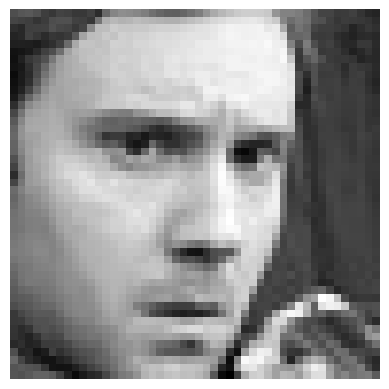

In [161]:
imagen = Image.open(df_copy['path_correct'][0])
plt.imshow(imagen, cmap='gray')
plt.axis('off')  
plt.show()

In [162]:
pixels = imagen.convert('RGB').getdata()
# Inicializar una variable para marcar si la imagen está a color
es_a_color = False

# Verificar si hay colores distintos de gris
for pixel in pixels:
    r, g, b = pixel
    if r != g or g != b or r != b:  # Si alguno de los canales es diferente, entonces hay color
        es_a_color = True
        break  # No es necesario seguir revisando más píxeles

# Imprimir el resultado
if es_a_color:
    print("La imagen está a color.")
else:
    print("La imagen está en escala de grises.")

La imagen está en escala de grises.


In [163]:
imagen.size

(48, 48)

In [164]:
df_copy.shape

(28821, 2)

## Dividir entre train y test

In [165]:
X = df_copy['path_correct']
y = df_copy['label_corr']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)
print()
print(X_train.dtype)
print(y_train.dtype)

X_train (20174,)
y_train (20174,)
X_test (8647,)
y_test (8647,)

object
int64


In [166]:
# Crear DataFrames para el generador
train_df = pd.DataFrame({'filepath': X_train, 'category': y_train})
val_df = pd.DataFrame({'filepath': X_test, 'category': y_test})
train_df['category'] = train_df['category'].astype(str)
val_df['category'] = val_df['category'].astype(str)

# Configuración de los generadores de datos de imágenes
IMG_HEIGHT, IMG_WIDTH = 48, 48  # Tamaño de las imágenes
BATCH_SIZE = 32  # Tamaño del lote

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Generador de datos de entrenamiento
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filepath',
    y_col='category',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode='grayscale',  
    batch_size=BATCH_SIZE,
    class_mode='sparse'
)

# Generador de datos de validación
val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col='filepath',
    y_col='category',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='sparse'
)

Found 20174 validated image filenames belonging to 7 classes.
Found 8647 validated image filenames belonging to 7 classes.


## Modelos 'a mano' y transfer learning

### Modelo 'a mano'

In [167]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Capas convolucionales
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(rate=0.20))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(rate=0.30))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(rate=0.30))

# Capas completamente conectadas
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(128, activation='relu'))
model.add(Dense(7, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

c:\Users\Alfonso\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,733,127 (6.61 MB)

 Trainable params: 1,733,127 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

In [168]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(train_generator,
                    validation_data=val_generator,
                    steps_per_epoch=100,
                    epochs=20,
                    batch_size=64,
                    callbacks=[early_stopping])

Epoch 1/20


c:\Users\Alfonso\miniconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 220ms/step - accuracy: 0.2094 - loss: 1.8753 - val_accuracy: 0.2485 - val_loss: 1.8199
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 216ms/step - accuracy: 0.2235 - loss: 1.8287 - val_accuracy: 0.2485 - val_loss: 1.8133
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 208ms/step - accuracy: 0.2420 - loss: 1.8148 - val_accuracy: 0.2485 - val_loss: 1.8206
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 200ms/step - accuracy: 0.2467 - loss: 1.8144 - val_accuracy: 0.2485 - val_loss: 1.8130
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 203ms/step - accuracy: 0.2434 - loss: 1.8142 - val_accuracy: 0.2559 - val_loss: 1.8096
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 196ms/step - accuracy: 0.2427 - loss: 1.8055 - val_accuracy: 0.2559 - val_loss: 1.8106
Epoch 7/20
 31/100 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - accuracy: 0.2417 - loss: 1.8007

c:\Users\Alfonso\miniconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 140ms/step - accuracy: 0.2453 - loss: 1.7981 - val_accuracy: 0.2489 - val_loss: 1.8027
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 212ms/step - accuracy: 0.2455 - loss: 1.8059 - val_accuracy: 0.2488 - val_loss: 1.7874
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 195ms/step - accuracy: 0.2738 - loss: 1.7883 - val_accuracy: 0.2525 - val_loss: 1.7914
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 197ms/step - accuracy: 0.2413 - loss: 1.7982 - val_accuracy: 0.2625 - val_loss: 1.7859
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 201ms/step - accuracy: 0.2578 - loss: 1.7761 - val_accuracy: 0.2565 - val_loss: 1.7825
Epoch 12/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 198ms/step - accuracy: 0.2517 - loss: 1.7833 - val_accuracy: 0.2661 - val_loss: 1.7779
Epoch 13/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 197ms/step - accuracy: 0.2613 - loss: 1.7892 - val_accuracy: 0.2706 - val_loss: 1.7683
Epoch 14/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step - accuracy: 0.2511 - loss: 1.7899 

#### Curva aprendizaje modelo manual

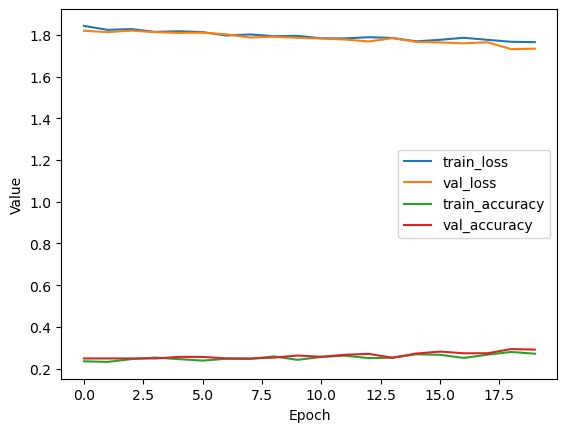

In [169]:
# Visualización del historial de entrenamiento
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

### Modelo de keras

#### ResNet50

In [170]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Conv2D, Dropout

# Crear una capa de entrada con 1 canal
input_layer = Input(shape=(48, 48, 1))

# Duplicar el canal para convertirlo a RGB
x = Conv2D(3, (3, 3), padding='same')(input_layer)

# Cargar ResNet50 pre-entrenado en ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(48, 48, 3))


# Añadir las capas personalizadas
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.30)(x)
x = Dense(128, activation='relu')(x)
output_layer = Dense(7, activation='softmax')(x)

# Crear el modelo final
model_resNet50 = Model(inputs=input_layer, outputs=output_layer)

# Congelar las capas del modelo base (ResNet50)
for layer in base_model.layers:
    layer.trainable = False

# Compilar el modelo
model_resNet50.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model_resNet50.summary()

Model: "functional_102"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_28 (InputLayer)     │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 48, 48, 3)      │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_9      │ (None, 3)              │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 512)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,205 (653.14 KB)

 Trainable params: 167,205 (653.14 KB)

 Non-trainable params: 0 (0.00 B)

In [171]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_ResNet = model_resNet50.fit(train_generator,
                    validation_data=val_generator,
                    steps_per_epoch=100,
                    epochs=20,
                    batch_size=100,
                    callbacks=[early_stopping])

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.2347 - loss: 1.8539 - val_accuracy: 0.2485 - val_loss: 1.8182
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.2251 - loss: 1.8346 - val_accuracy: 0.2485 - val_loss: 1.8114
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.2438 - loss: 1.8068 - val_accuracy: 0.2504 - val_loss: 1.7999
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.2619 - loss: 1.8011 - val_accuracy: 0.2485 - val_loss: 1.7958
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.2363 - loss: 1.8186 - val_accuracy: 0.2484 - val_loss: 1.7955
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.2447 - loss: 1.7980 - val_accuracy: 0.2507 - val_loss: 1.7896
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.2639 - loss: 1.7854 - val_accuracy: 0.2486 - val_loss: 1.7899
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - accuracy: 0.2554 - loss: 1.7876 - val_acc

##### Curva aprendizaje modelo ResNet50

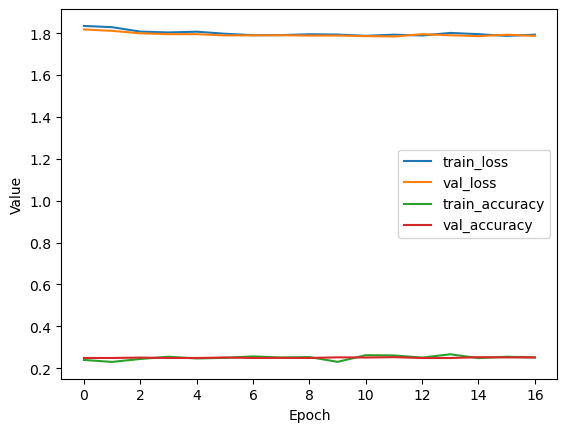

In [172]:
# Visualización del historial de entrenamiento
plt.plot(history_ResNet.history['loss'], label='train_loss')
plt.plot(history_ResNet.history['val_loss'], label='val_loss')
plt.plot(history_ResNet.history['accuracy'], label='train_accuracy')
plt.plot(history_ResNet.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

#### Modelo MobileNetV2

In [173]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout, Flatten, Conv2D
from tensorflow.keras.models import Model

# Crear una capa de entrada con 1 canal
input_layer = Input(shape=(48, 48, 1))

# Duplicar el canal para convertirlo a RGB
x = Conv2D(3, (3, 3), padding='same')(input_layer)

# Crear el modelo base de MobileNetV2
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(48, 48, 3))

# Pasar la salida de la capa de duplicación de canal a través del modelo base
x = base_model(x)

# Congelar las capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Añadir las capas personalizadas
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
output_layer = Dense(7, activation='softmax')(x)

model_mobile_v2 = Model(inputs=input_layer, outputs=output_layer)

# Compilar el modelo
model_mobile_v2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo para verificar que las capas están congeladas
model_mobile_v2.summary()


C:\Users\Alfonso\AppData\Local\Temp\ipykernel_12528\33833237.py:13: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(48, 48, 3))


Model: "functional_104"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_30 (InputLayer)     │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 48, 48, 3)      │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 2, 2, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_10     │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,079,013 (11.75 MB)

 Trainable params: 821,029 (3.13 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [174]:
mobile_v2_hist = model_mobile_v2.fit(train_generator,
                        validation_data=val_generator,
                        steps_per_epoch=100,
                        epochs=20)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 302ms/step - accuracy: 0.1969 - loss: 2.0594 - val_accuracy: 0.2911 - val_loss: 1.7602
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 291ms/step - accuracy: 0.2790 - loss: 1.7635 - val_accuracy: 0.3192 - val_loss: 1.7119
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 279ms/step - accuracy: 0.2582 - loss: 1.7876 - val_accuracy: 0.3110 - val_loss: 1.7202
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 279ms/step - accuracy: 0.2725 - loss: 1.7675 - val_accuracy: 0.3000 - val_loss: 1.7116
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 283ms/step - accuracy: 0.3048 - loss: 1.7440 - val_accuracy: 0.3042 - val_loss: 1.7300
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 281ms/step - accuracy: 0.2925 - loss: 1.7479 - val_accuracy: 0.3232 - val_loss: 1.6942
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 207ms/step - accuracy: 0.3086 - loss: 1.7344 - val_accuracy: 0.3216 - val_loss: 1.6896
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 281ms/step - accuracy: 0.2923 - loss: 1

##### Curva aprendizaje modelo MobileNetV2

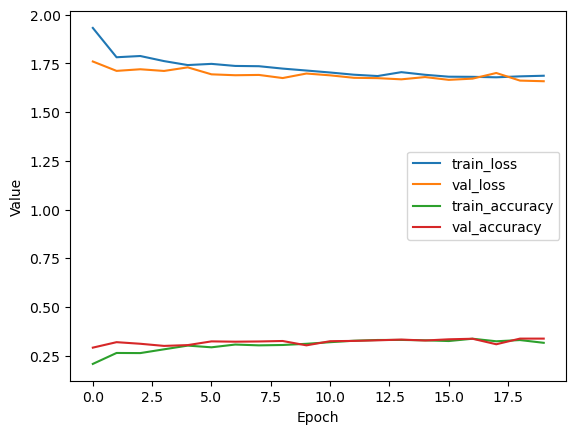

In [175]:
# Visualización del historial de entrenamiento
plt.plot(mobile_v2_hist.history['loss'], label='train_loss')
plt.plot(mobile_v2_hist.history['val_loss'], label='val_loss')
plt.plot(mobile_v2_hist.history['accuracy'], label='train_accuracy')
plt.plot(mobile_v2_hist.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

#### Modelo DenseNet121

In [176]:
from tensorflow.keras.applications import DenseNet121
# Crear una capa de entrada con 1 canal
input_layer = Input(shape=(48, 48, 1))

# Duplicar el canal para convertirlo a RGB
x = Conv2D(3, (3, 3), padding='same')(input_layer)

# Crear el modelo base 
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Pasar la salida de la capa de duplicación de canal a través del modelo base
x = base_model(x)

# Congelar las capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Añadir las capas personalizadas
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.35)(x)
x = Dense(128, activation='relu')(x)
output_layer = Dense(7, activation='softmax')(x)

model_Dense_121 = Model(inputs=input_layer, outputs=output_layer)

# Compilar el modelo
model_Dense_121.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo para verificar que las capas están congeladas
model_Dense_121.summary()

Model: "functional_106"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_32 (InputLayer)     │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 48, 48, 3)      │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densenet121 (Functional)        │ (None, 1, 1, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_11     │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,727,461 (29.48 MB)

 Trainable params: 689,957 (2.63 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [177]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_Dense_121 = model_Dense_121.fit(train_generator,
                    validation_data=val_generator,
                    steps_per_epoch=100,
                    epochs=20,
                    batch_size=100,
                    callbacks=[early_stopping])

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 112s 927ms/step - accuracy: 0.1905 - loss: 1.9113 - val_accuracy: 0.2497 - val_loss: 1.7929
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 92s 929ms/step - accuracy: 0.2297 - loss: 1.8250 - val_accuracy: 0.2673 - val_loss: 1.7602
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 95s 951ms/step - accuracy: 0.2501 - loss: 1.7733 - val_accuracy: 0.3015 - val_loss: 1.7287
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 93s 939ms/step - accuracy: 0.2697 - loss: 1.7823 - val_accuracy: 0.2904 - val_loss: 1.7341
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 90s 906ms/step - accuracy: 0.2708 - loss: 1.7430 - val_accuracy: 0.3260 - val_loss: 1.6876
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 94s 945ms/step - accuracy: 0.2843 - loss: 1.7396 - val_accuracy: 0.3165 - val_loss: 1.7009
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 61s 616ms/step - accuracy: 0.2769 - loss: 1.7466 - val_accuracy: 0.3186 - val_loss: 1.6872
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 95s 949ms/step - accuracy: 0.2945 - loss: 

##### Curva aprendizaje modelo DenseNet121

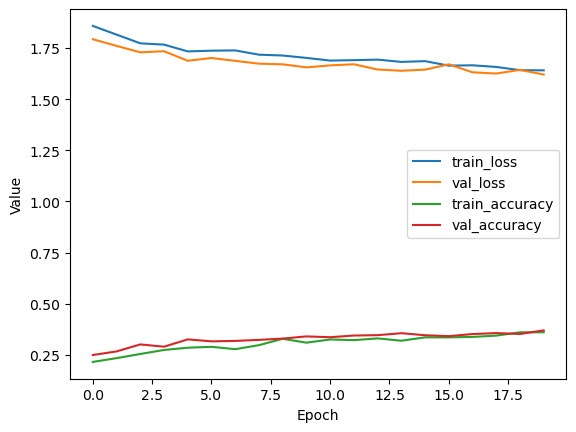

In [178]:
# Visualización del historial de entrenamiento
plt.plot(history_Dense_121.history['loss'], label='train_loss')
plt.plot(history_Dense_121.history['val_loss'], label='val_loss')
plt.plot(history_Dense_121.history['accuracy'], label='train_accuracy')
plt.plot(history_Dense_121.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

## Modelos Fine-Tuning

### ResNet50

In [179]:
# Crear una capa de entrada con 1 canal
input_layer = Input(shape=(48, 48, 1))

# Duplicar el canal para convertirlo a RGB
x = Conv2D(3, (3, 3), padding='same')(input_layer)

# Crear el modelo base de ResNet50
base_model = ResNet50(weights=None, include_top=False, input_tensor=x)

# Pasar la salida de la capa de duplicación de canal a través del modelo base
x = base_model.output

# Congelar las capas del modelo base (ResNet50)
for layer in base_model.layers:
    layer.trainable = False

# Añadir las capas personalizadas
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.30)(x)
x = Dense(128, activation='relu')(x)
output_layer = Dense(7, activation='softmax')(x)

# Crear el modelo final
model_resNet50_FT = Model(inputs=input_layer, outputs=output_layer)

# Compilar el modelo
model_resNet50_FT.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model_resNet50_FT.summary()


Model: "functional_108"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_34      │ (None, 48, 48, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_37 (Conv2D)  │ (None, 48, 48, 3) │         30 │ input_layer_34[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 54, 54, 3) │          0 │ conv2d_37[0][0]   │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 24, 24,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 24, 24,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 24, 24,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 26, 26,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 12, 12,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 12, 12,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 12, 12,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 12, 12,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 12, 12,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 12, 12,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 12, 12,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 12, 12,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 12, 12,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 12, 12,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                 

 Total params: 24,801,957 (94.61 MB)

 Trainable params: 1,214,215 (4.63 MB)

 Non-trainable params: 23,587,742 (89.98 MB)

In [180]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_ResNet50_FT = model_resNet50.fit(train_generator,
                    validation_data=val_generator,
                    steps_per_epoch=100,
                    epochs=20,
                    batch_size=100,
                    callbacks=[early_stopping])

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - accuracy: 0.2619 - loss: 1.7819 - val_accuracy: 0.2519 - val_loss: 1.7866
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.2500 - loss: 1.7807 - val_accuracy: 0.2518 - val_loss: 1.7914
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.2558 - loss: 1.7890 - val_accuracy: 0.2481 - val_loss: 1.7933
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.2553 - loss: 1.7941 - val_accuracy: 0.2508 - val_loss: 1.7868
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.2489 - loss: 1.7940 - val_accuracy: 0.2515 - val_loss: 1.7884
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.2405 - loss: 1.8035 - val_accuracy: 0.2485 - val_loss: 1.7885


##### Curva aprendizaje modelo ResNet50

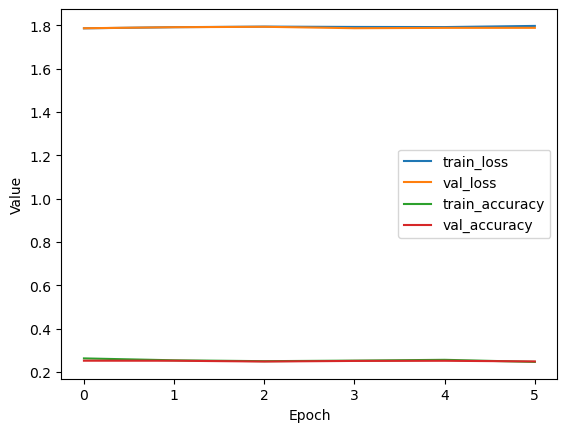

In [181]:
# Visualización del historial de entrenamiento
plt.plot(history_ResNet50_FT .history['loss'], label='train_loss')
plt.plot(history_ResNet50_FT .history['val_loss'], label='val_loss')
plt.plot(history_ResNet50_FT .history['accuracy'], label='train_accuracy')
plt.plot(history_ResNet50_FT .history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

#### Modelo MobileNetV2

In [182]:
# Crear una capa de entrada con 1 canal
input_layer = Input(shape=(48, 48, 1))

# Duplicar el canal para convertirlo a RGB
x = Conv2D(3, (3, 3), padding='same')(input_layer)

# Crear el modelo base de MobileNetV2
base_model = MobileNetV2(include_top=False, weights=None, input_shape=(48, 48, 3))

# Pasar la salida de la capa de duplicación de canal a través del modelo base
x = base_model(x)

# Congelar las capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Añadir las capas personalizadas
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
output_layer = Dense(7, activation='softmax')(x)

model_mobile_v2_FT = Model(inputs=input_layer, outputs=output_layer)

# Compilar el modelo
model_mobile_v2_FT.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo para verificar que las capas están congeladas
model_mobile_v2_FT.summary()


Model: "functional_110"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_35 (InputLayer)     │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 48, 48, 3)      │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_48             │ (None, 2, 2, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_13     │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,079,013 (11.75 MB)

 Trainable params: 821,029 (3.13 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [183]:
mobile_v2_hist_FT = model_mobile_v2.fit(train_generator,
                        validation_data=val_generator,
                        steps_per_epoch=100,
                        epochs=20)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 334ms/step - accuracy: 0.3258 - loss: 1.6915 - val_accuracy: 0.3340 - val_loss: 1.6644
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 332ms/step - accuracy: 0.3270 - loss: 1.6670 - val_accuracy: 0.3360 - val_loss: 1.6626
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 303ms/step - accuracy: 0.3264 - loss: 1.6779 - val_accuracy: 0.3360 - val_loss: 1.6610
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 361ms/step - accuracy: 0.3267 - loss: 1.6833 - val_accuracy: 0.3410 - val_loss: 1.6507
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 342ms/step - accuracy: 0.3269 - loss: 1.6703 - val_accuracy: 0.3378 - val_loss: 1.6558
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 311ms/step - accuracy: 0.3381 - loss: 1.6687 - val_accuracy: 0.3318 - val_loss: 1.6574
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 236ms/step - accuracy: 0.3213 - loss: 1.6924 - val_accuracy: 0.3413 - val_loss: 1.6532
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 322ms/step - accuracy: 0.3449 - loss: 1

##### Curva aprendizaje modelo MobileNetV2

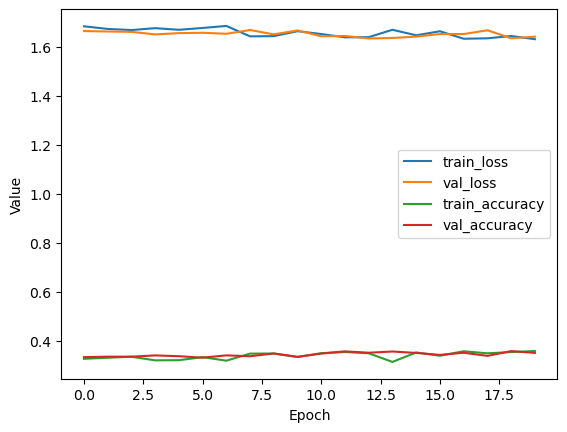

In [184]:
# Visualización del historial de entrenamiento
plt.plot(mobile_v2_hist_FT.history['loss'], label='train_loss')
plt.plot(mobile_v2_hist_FT.history['val_loss'], label='val_loss')
plt.plot(mobile_v2_hist_FT.history['accuracy'], label='train_accuracy')
plt.plot(mobile_v2_hist_FT.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

#### Modelo DenseNet121

In [185]:
from tensorflow.keras.applications import DenseNet121
# Crear una capa de entrada con 1 canal
input_layer = Input(shape=(48, 48, 1))

# Duplicar el canal para convertirlo a RGB
x = Conv2D(3, (3, 3), padding='same')(input_layer)

# Crear el modelo base 
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Pasar la salida de la capa de duplicación de canal a través del modelo base
x = base_model(x)

# Congelar las capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Añadir las capas personalizadas
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.35)(x)
x = Dense(128, activation='relu')(x)
output_layer = Dense(7, activation='softmax')(x)

model_Dense_121_FT = Model(inputs=input_layer, outputs=output_layer)

# Compilar el modelo
model_Dense_121_FT.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo para verificar que las capas están congeladas
model_Dense_121_FT.summary()

Model: "functional_112"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_37 (InputLayer)     │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 48, 48, 3)      │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densenet121 (Functional)        │ (None, 1, 1, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_14     │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,727,461 (29.48 MB)

 Trainable params: 689,957 (2.63 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [186]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_Dense_121_FT = model_Dense_121.fit(train_generator,
                    validation_data=val_generator,
                    steps_per_epoch=100,
                    epochs=20,
                    batch_size=100,
                    callbacks=[early_stopping])

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 96s 954ms/step - accuracy: 0.3702 - loss: 1.6359 - val_accuracy: 0.3653 - val_loss: 1.6257
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 92s 921ms/step - accuracy: 0.3464 - loss: 1.6606 - val_accuracy: 0.3538 - val_loss: 1.6184
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.3390 - loss: 1.6521 - val_accuracy: 0.3716 - val_loss: 1.6036
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.3374 - loss: 1.6554 - val_accuracy: 0.3666 - val_loss: 1.6233
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 97s 974ms/step - accuracy: 0.3418 - loss: 1.6655 - val_accuracy: 0.3476 - val_loss: 1.6561
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.3494 - loss: 1.6539 - val_accuracy: 0.3509 - val_loss: 1.6310
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 65s 656ms/step - accuracy: 0.3450 - loss: 1.6309 - val_accuracy: 0.3774 - val_loss: 1.6009
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 94s 940ms/step - accuracy: 0.3462 - loss: 1.6371 

##### Curva aprendizaje modelo DenseNet121

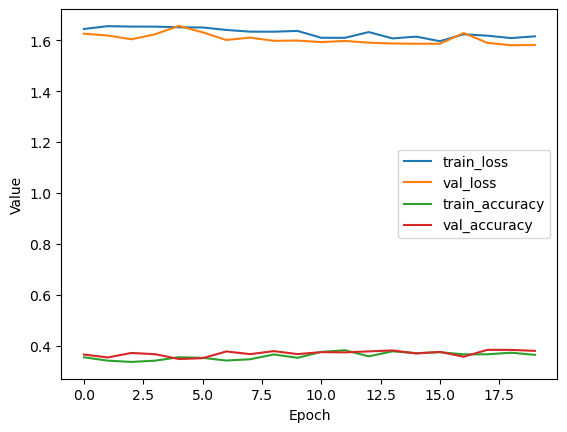

In [187]:
# Visualización del historial de entrenamiento
plt.plot(history_Dense_121_FT.history['loss'], label='train_loss')
plt.plot(history_Dense_121_FT.history['val_loss'], label='val_loss')
plt.plot(history_Dense_121_FT.history['accuracy'], label='train_accuracy')
plt.plot(history_Dense_121_FT.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

In [188]:
m

NameError: name 'm' is not defined

In [ ]:
IM_SIZE = 75
def read_data(base_path, categories, im_size):
    X = []
    Y = []

    for category_name, category_label in categories.items():
        category_path = os.path.join(base_path, category_name)
        for file in os.listdir(category_path):
            file_path = os.path.join(category_path, file)
            image = Image.open(file_path)
            image = image.resize((im_size, im_size))
            image_array = np.array(image) / 255.0  # Normalizar la imagen

            X.append(image_array)
            Y.append(category_label)

    return np.array(X), np.array(Y)

In [ ]:
TEST_PATH = './data/seg_test'
X_train, y_train = read_data(TRAIN_PATH, categories_paisajes, IM_SIZE)
X_test, y_test = read_data(TEST_PATH, categories_paisajes, IM_SIZE)

In [ ]:
from tensorflow.keras.utils import to_categorical

# Convertir las etiquetas de enteros a one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=6)
y_test_one_hot = to_categorical(y_test, num_classes=6)

# Ahora puedes evaluar el modelo con las etiquetas en formato one-hot
results = model.evaluate(X_test, y_test_one_hot)
print("test loss, test acc:", results)

94/94 ━━━━━━━━━━━━━━━━━━━━ 16s 165ms/step - accuracy: 0.7935 - loss: 0.5460
test loss, test acc: [0.6199309825897217, 0.7680000066757202]


In [ ]:
# Generar predicciones
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 16s 172ms/step


In [ ]:
report = classification_report(y_test, y_pred_classes, target_names=list(categories_paisajes.keys()))
print(report)

              precision    recall  f1-score   support

   buildings       0.82      0.81      0.81       437
      forest       0.94      0.93      0.93       474
     glacier       0.68      0.70      0.69       553
    mountain       0.65      0.70      0.67       525
         sea       0.78      0.66      0.72       510
      street       0.79      0.84      0.81       501

    accuracy                           0.77      3000
   macro avg       0.78      0.77      0.77      3000
weighted avg       0.77      0.77      0.77      3000



In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print(conf_matrix)

[[353   5   3   4  11  61]
 [  3 439   5   6   2  19]
 [  5   3 387 109  37  12]
 [  6   5 110 366  31   7]
 [ 13   8  62  75 339  13]
 [ 50   7   6   6  12 420]]


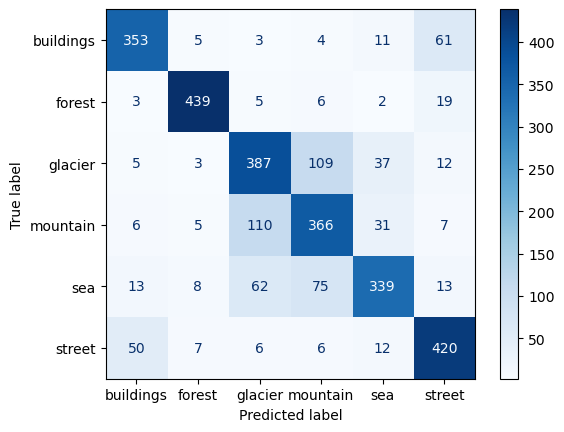

In [ ]:
labels = list(categories_paisajes.keys())
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

4. Hacer un fine-tuning con la misma cabeza diseñada en el punto anterior. Mostrar la evaluación contra test, el report de clasificación y la matriz de confusión.

In [ ]:
base_model_fine = InceptionV3(input_shape = (IMG_HEIGHT, IMG_WIDTH,3),
                         include_top=False, # Importante!! # Quitamos la 'cabeza'
                        weights = None, # Importante!! # Quitamos los pesos
                        classifier_activation="softmax")

In [ ]:
x = layers.Flatten()(base_model_fine.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x= layers.Dense(256, activation = 'relu')(x)
x= layers.Dense(6, activation='softmax')(x)

model_fine = tf.keras.models.Model(base_model_fine.input,x)

model_fine.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
history = model_fine.fit(train_generator, validation_data = val_generator, steps_per_epoch = 100, epochs = 10)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 199s 1s/step - accuracy: 0.3351 - loss: 1.9195 - val_accuracy: 0.1621 - val_loss: 1.9210
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.5008 - loss: 1.3307 - val_accuracy: 0.1835 - val_loss: 2.7679
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.5821 - loss: 1.1622 - val_accuracy: 0.2643 - val_loss: 2.3675
Epoch 4/10
 51/100 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.5557 - loss: 1.1901

c:\Users\Alfonso\miniconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 76s 751ms/step - accuracy: 0.5572 - loss: 1.1867 - val_accuracy: 0.3634 - val_loss: 1.7057
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.5770 - loss: 1.1169 - val_accuracy: 0.5344 - val_loss: 1.3079
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.6407 - loss: 1.0529 - val_accuracy: 0.6566 - val_loss: 1.0210
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.6453 - loss: 1.0103 - val_accuracy: 0.6220 - val_loss: 1.0871
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 76s 753ms/step - accuracy: 0.6598 - loss: 0.9916 - val_accuracy: 0.6580 - val_loss: 0.9932
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.6649 - loss: 0.9870 - val_accuracy: 0.5390 - val_loss: 1.4621
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.6084 - loss: 1.1277 - val_accuracy: 0.6110 - val_loss: 1.0998


In [ ]:
# Asumiendo que 'X_test' y 'y_test' son tus datos y etiquetas de prueba
test_loss, test_accuracy = model_fine.evaluate(X_test, y_test_one_hot)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 16s 173ms/step - accuracy: 0.7024 - loss: 0.9002
Test Loss: 1.0960179567337036
Test Accuracy: 0.6179999709129333


In [ ]:
# Generar predicciones
y_pred_fine = model_fine.predict(X_test)
y_pred_classes_fine = np.argmax(y_pred_fine, axis=1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 28s 268ms/step


In [ ]:
report = classification_report(y_test, y_pred_classes_fine, target_names=list(categories_paisajes.keys()))
print(report)

              precision    recall  f1-score   support

   buildings       0.50      0.80      0.62       437
      forest       0.95      0.67      0.79       474
     glacier       0.67      0.62      0.65       553
    mountain       0.49      0.80      0.61       525
         sea       0.90      0.11      0.20       510
      street       0.67      0.73      0.70       501

    accuracy                           0.62      3000
   macro avg       0.70      0.62      0.59      3000
weighted avg       0.70      0.62      0.59      3000



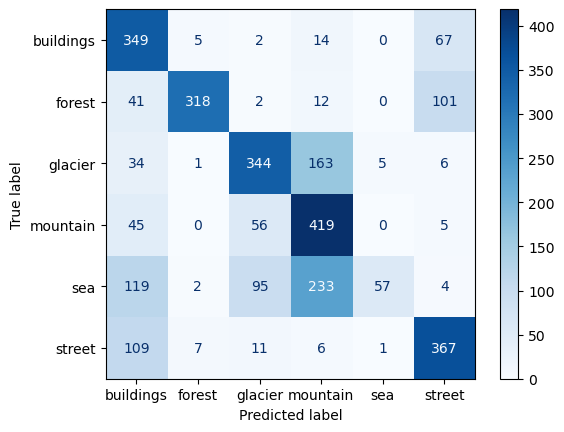

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_classes_fine)
labels = list(categories_paisajes.keys())
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

5. Comparar los resultados con los obtenidos con la red convolucional del ejercicio mencionado.

In [ ]:
# No sé muy bien a qué se refiere el enunciado. Supongo que hay que compara los resultados entre el transfer-learning y el fine-tuning...
from sklearn.metrics import roc_auc_score

auc_transfer = roc_auc_score(y_test, y_pred, multi_class='ovr')
auc_fine = roc_auc_score(y_test,y_pred_fine, multi_class='ovr')
print(f'El AUC del transfer-learning es: {auc_transfer}')
print(f'El AUC para el fine-tuning es: {auc_fine}')

El AUC del transfer-learning es: 0.9563214552678051
El AUC para el fine-tuning es: 0.9112857286981938


El accuracy medio del transfer-learning es de 0.77 vs el del fine-tuning que es de 0.66.  
El transfer-learning parece que predice mejor todas las categorías, sin embago el fine-tuning tiene más dificultades sobre todo con 'mountain' que lo confunde con 'sea' y con 'glacier'.  
También tiene problemas con 'buildings' que lo confunde con 'street' y 'sea', y con 'street' que lo confunde con 'forest'.

EXTRA:
Repetir el transfer learning empleando aumentado de imágenes.

De primeras lo hice con el aumentado.